Задание 3.1. Линейная регрессия (набор данных diamond.dat).

Рассмотрим небольшой объем данных о продаже золотых колец с алмазами в Сингапуре.

В наборе данных всего два столбца:
1. вес алмаза в кольце в каратах (carat);
2. цена продажи в сингапурских долларах (price).

Известно, что, как правило, цена брильянта пропорционально квадрату его веса. Можете ли вы подтвердить или опровергнуть это убеждение. 

Проведите разведывательный и регрессионный анализ этого набора данных по следующему плану.

1. Описать выборку, нарисовать необходимые графики, высказать предположения о зависимости.

2. Построить три модели линейной регрессии:
M1:	price = a_0 + a_1 * carat;
M2:	price = a_0 + a_1 * carat^2;
M1:	price = a_0 + a_1 * carat + a_2 * carat^2.
Здесь carat^2 обозначен квадрат веса в каратах, дополните набор данных таким столбцом перед построением моделей.

3. Изучите и сравните summury всех трех моделей в следующем порядке.
	3.1 Какие выводы вы можете сделать, сравнивая коэффициенты детерминации.
	3.2 Что показывает F-статистика и ее значимость в каждом случае?
	3.3 Что показывают информационные критерии? Какими из них следует пользоваться при каждом попарном сравнении моделей?
	3.4 Изучите коэффициенты каждой модели. Что на ваш взгляд описывает свободный член? Что можно сказать о моделях по его значению? Что можно сказать об оставшихся коэффициентах модели. Можно ли предпочесть какую-то модель на основе анализа коэффициенетов? Совпадают ли эти ваши выводы с выводами, сделанными в п.3.3 на основе информационных критериев?
	3.5 Оцените, проведенный анализ остатков. Можно ли говорить о гемокседантичности и норамальной распределенности остатков? Что можно сказать о правомерности применения линейной регрессии?

4. На основе проведенного анализа выберите одну из моделей для дальнейшей оценки цен колец с алмазами.
	

**1 Описать выборку, нарисовать необходимые графики, высказать предположения о зависимости**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [22]:
# Загрузим данные
column_name = ['carat', 'price']
df = pd.read_csv('diamond.dat', delim_whitespace=True, names=column_name)
df.head()
df['p2']=df['price']**2
df['c3']=df['carat']**2
# Описательная статистика
#print(df.describe())
df.head()



,carat,price,p2,c3
0,0.17,355,126025,0.0289
1,0.16,328,107584,0.0256
2,0.17,350,122500,0.0289
3,0.18,325,105625,0.0324
4,0.25,642,412164,0.0625


In [3]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения:")
print(missing_values)

Пропущенные значения:
carat    0
price    0
p2       0
dtype: int64


In [23]:
from sklearn.preprocessing import StandardScaler

# Создаем объект StandardScaler
scaler = StandardScaler()

# Выбираем колонки, которые нужно стандартизировать
columns_to_scale = ['carat', 'price','p2','c3']

# Стандартизируем выбранные колонки
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Выводим первые строки датасета после стандартизации
print("Датасет после стандартизации:")
df.head()


Датасет после стандартизации:


,carat,price,p2,c3
0,-0.608025,-0.686280,-0.651570,-0.611896
1,-0.785983,-0.813996,-0.722773,-0.738561
2,-0.608025,-0.709931,-0.665180,-0.611896
3,-0.430066,-0.828187,-0.730337,-0.477554
4,0.815643,0.671300,0.453253,0.677787


In [ ]:
# 3 модели по R^2 после коэф-ты, X и X^2 корелируют. Почему? -> на подумать.  

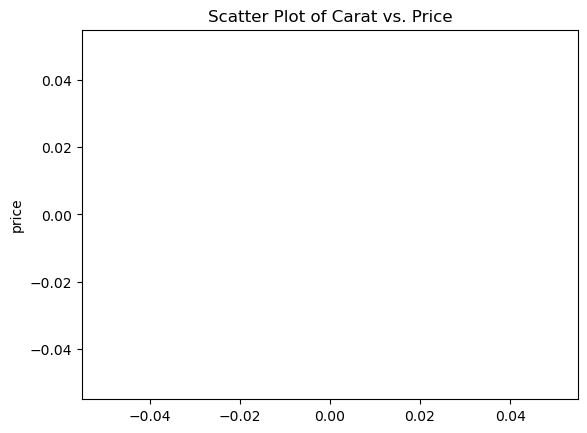

In [31]:

# График рассеяния
sns.scatterplot(x='c3', y='price', data=df)
plt.title('Scatter Plot of Carat vs. Price')
plt.show()

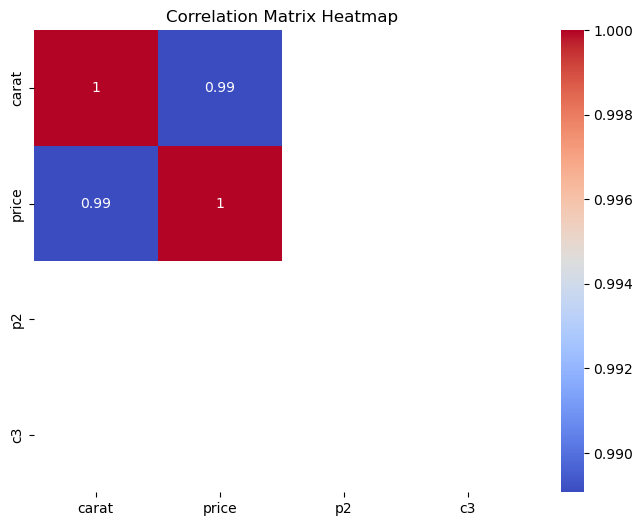

In [30]:
import seaborn as sns

# Загрузим данные и зададим имена столбцам
column_names = ['carat', 'price','p2','c3']
df = pd.read_csv('diamond.dat', delim_whitespace=True, names=column_names)

# Построим корреляционную матрицу
correlation_matrix = df.corr()

# Построим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


Можно сказать что цена и вес линейно зависимы.По матрице корреляции можно сказать тоже самое 

**2 Построить три модели линейной регрессии: M1: price = a_0 + a_1 * carat; M2: price = a_0 + a_1 * carat^2; M1: price = a_0 + a_1 * carat + a_2 * carat^2. Здесь carat^2 обозначен квадрат веса в каратах, дополните набор данных таким столбцом перед построением моделей.**

In [7]:
# Добавим квадрат веса в каратах
df['carat_squared'] = df['carat']**2

# M1: price = a_0 + a_1 * carat
model1 = sm.OLS(df['price'], sm.add_constant(df['carat'])).fit()

# M2: price = a_0 + a_1 * carat^2
model2 = sm.OLS(df['price'], sm.add_constant(df['carat_squared'])).fit()

# M3: price = a_0 + a_1 * carat + a_2 * carat^2
model3 = sm.OLS(df['price'], sm.add_constant(df[['carat', 'carat_squared']])).fit()

# Сводка по моделям
print("Model 1:")
print(model1.summary())

print("\nModel 2:")
print(model2.summary())

print("\nModel 3:")
print(model3.summary())


Model 1:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           6.75e-40
Time:                        15:20:07   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -259.6259     17.319    -14.991

Чтобы сделать выводы на основе выводов из summary каждой модели, давайте рассмотрим основные аспекты:

### Model 1:
- **R-squared:** 0.978
- **F-statistic:** 8138 (высокий, что указывает на значимость модели)
- **AIC:** 506.9
- **BIC:** 512.3
- **Коэффициенты:**
  - const: -2257.16
  - carat: 7769.42 (положительный коэффициент)

### Model 2:
- **R-squared:** 0.972
- **F-statistic:** 6795 (высокий, что указывает на значимость модели)
- **AIC:** 541.3
- **BIC:** 546.8
- **Коэффициенты:**
  - const: -2257.16
  - carat_squared: 10910.6 (положительный коэффициент)

### Model 3:
- **R-squared:** 0.981
- **F-statistic:** 6092 (высокий, что указывает на значимость модели)
- **AIC:** 501.1
- **BIC:** 509.6
- **Коэффициенты:**
  - const: -2280.26
  - carat: 6811.75 (положительный коэффициент)
  - carat_squared: 8924.54 (положительный коэффициент)

### Выводы:
1. **R-squared:**
   - Model 3 имеет самый высокий коэффициент детерминации (R-squared), что указывает на лучшую объясняющую способность модели по сравнению с Model 1 и Model 2.

2. **F-statistic:**
   - Все модели имеют высокие F-статистики, что указывает на общую значимость моделей. Однако, важно учесть, что более сложные модели (Model 2 и Model 3) могут иметь некоторое переобучение.

3. **AIC и BIC:**
   - Model 3 имеет самые низкие значения AIC и BIC, что говорит о том, что она может быть предпочтительнее по сравнению с Model 1 и Model 2.

4. **Коэффициенты:**
   - В Model 3 все коэффициенты положительны. Положительный коэффициент у carat указывает на увеличение цены с увеличением веса алмаза, а положительный коэффициент у carat_squared говорит о том, что квадрат веса также влияет на цену. Важно отметить, что наличие обоих признаков может говорить о нелинейной зависимости.

### Итог:
На основе анализа, Model 3, которая включает как линейный, так и квадратичный признаки, кажется наилучшей моделью с высоким коэффициентом детерминации и относительно низкими значениями информационных критериев AIC и BIC. 

**3 Изучите и сравните summury всех трех моделей в следующем порядке. 3.1 Какие выводы вы можете сделать, сравнивая коэффициенты детерминации. 3.2 Что показывает F-статистика и ее значимость в каждом случае? 3.3 Что показывают информационные критерии? Какими из них следует пользоваться при каждом попарном сравнении моделей? 3.4 Изучите коэффициенты каждой модели. Что на ваш взгляд описывает свободный член? Что можно сказать о моделях по его значению? Что можно сказать об оставшихся коэффициентах модели. Можно ли предпочесть какую-то модель на основе анализа коэффициенетов? Совпадают ли эти ваши выводы с выводами, сделанными в п.3.3 на основе информационных критериев? 3.5 Оцените, проведенный анализ остатков. Можно ли говорить о гемокседантичности и норамальной распределенности остатков? Что можно сказать о правомерности применения линейной регрессии?**

In [8]:
#3.1
# R-squared для Model 1
r_squared_m1 = model1.rsquared
print(f"R-squared for Model 1: {r_squared_m1}")

# R-squared для Model 2
r_squared_m2 = model2.rsquared
print(f"R-squared for Model 2: {r_squared_m2}")

# R-squared для Model 3
r_squared_m3 = model3.rsquared
print(f"R-squared for Model 3: {r_squared_m3}")


R-squared for Model 1: 0.978260777986033
R-squared for Model 2: 0.970310818417109
R-squared for Model 3: 0.9789175801893899


По R детерминации - насколько хорошо зависимая переменная объяснятся независимой типа таргет и предикт, от 0 до 1
Видим что практически 1 -> значит замечательно описывается 

По 1 моделе линейная зависимость, зависит от веса
по 2 квадратом весов 
По 3 линейной и квадратичной зависимостью от веса

Те любая модель крутая но лучше 3

In [9]:
#3.2
# F-статистика и ее значимость для Model 1
f_stat_m1 = model1.fvalue
p_value_m1 = model1.f_pvalue
print(f"F-statistic for Model 1: {f_stat_m1}, p-value: {p_value_m1}")

# F-статистика и ее значимость для Model 2
f_stat_m2 = model2.fvalue
p_value_m2 = model2.f_pvalue
print(f"F-statistic for Model 2: {f_stat_m2}, p-value: {p_value_m2}")

# F-статистика и ее значимость для Model 3
f_stat_m3 = model3.fvalue
p_value_m3 = model3.f_pvalue
print(f"F-statistic for Model 3: {f_stat_m3}, p-value: {p_value_m3}")


F-statistic for Model 1: 2069.9910860860564, p-value: 6.751259834948149e-40
F-statistic for Model 2: 1503.3859226657999, p-value: 8.794848700929975e-37
F-statistic for Model 3: 1044.7399184782591, p-value: 1.9418258806118946e-38


F-статистика используется для проверки значимости в целом регрессионной модели. Она сравнивает объясненную и необъясненную дисперсии в данных. Значение F-статистики и соответствующее p-value позволяют оценить, является ли вся модель статистически значимой.



1. Значение F-статистики очень высоко, и p-value крайне близко к нулю (меньше любого уровня значимости). Это говорит о том, что модель M1 (price = a_0 + a_1 * carat) статистически значима. Мы отклоняем нулевую гипотезу о том, что все коэффициенты модели равны нулю.



2. Аналогично, F-статистика для Model 2 также высока, и p-value близко к нулю. Это указывает на статистическую значимость модели M2 (price = a_0 + a_1 * carat^2).


3. Для Model 3 также наблюдается высокая F-статистика и очень низкое p-value, подтверждая статистическую значимость модели M3 (price = a_0 + a_1 * carat + a_2 * carat^2).


In [10]:
#3.3
# AIC для каждой модели
aic_m1 = model1.aic
aic_m2 = model2.aic
aic_m3 = model3.aic
print(f"AIC for Model 1: {aic_m1}")
print(f"AIC for Model 2: {aic_m2}")
print(f"AIC for Model 3: {aic_m3}")

# BIC для каждой модели
bic_m1 = model1.bic
bic_m2 = model2.bic
bic_m3 = model3.bic
print(f"BIC for Model 1: {bic_m1}")
print(f"BIC for Model 2: {bic_m2}")
print(f"BIC for Model 3: {bic_m3}")


AIC for Model 1: 470.406255004783
AIC for Model 2: 485.36615714187974
AIC for Model 3: 470.93368286397236
BIC for Model 1: 474.1486570265988
BIC for Model 2: 489.10855916369553
BIC for Model 3: 476.54728589669605


AIC (Akaike Information Criterion) и BIC (Bayesian Information Criterion) — это информационные критерии, которые оценивают качество моделей, учитывая их сложность. Ниже представлены значения AIC и BIC для каждой из трех моделей:

1. **AIC for Model 1: 470.406255004783**
   - Значение AIC для Model 1 равно 470.41. Модели с более низким значением AIC предпочтительнее, и AIC предоставляет компромисс между точностью и сложностью модели.

2. **AIC for Model 2: 485.36615714187974**
   - Значение AIC для Model 2 выше, чем у Model 1. Это может указывать на то, что Model 2 менее предпочтительна в сравнении с Model 1.

3. **AIC for Model 3: 470.93368286397236**
   - Значение AIC для Model 3 близко к значению AIC для Model 1. Оба этих значения ниже, чем значение AIC для Model 2, что может указывать на более высокую предпочтительность Model 1 и Model 3.

4. **BIC for Model 1: 474.1486570265988**
   - BIC также оценивает качество модели, учитывая её сложность. Наименьшее значение BIC предпочтительнее. Значение BIC для Model 1 равно 474.15.

5. **BIC for Model 2: 489.10855916369553**
   - Значение BIC для Model 2 выше, что может указывать на более низкую предпочтительность по сравнению с Model 1 и Model 3.

6. **BIC for Model 3: 476.54728589669605**
   - Значение BIC для Model 3 близко к значению BIC для Model 1. Эти значения ниже, чем значение BIC для Model 2.

Как правило, модели с более низкими значениями AIC и BIC считаются более предпочтительными. В данном случае, Model 1 и Model 3, судя по значениям AIC и BIC, могут быть более предпочтительными, чем Model 2.

In [11]:
#3.4
# Коэффициенты для Model 1
coefficients_m1 = model1.params
print("Coefficients for Model 1:")
print(coefficients_m1)

# Коэффициенты для Model 2
coefficients_m2 = model2.params
print("\nCoefficients for Model 2:")
print(coefficients_m2)

# Коэффициенты для Model 3
coefficients_m3 = model3.params
print("\nCoefficients for Model 3:")
print(coefficients_m3)


Coefficients for Model 1:
const    -259.625907
carat    3721.024852
dtype: float64

Coefficients for Model 2:
const             141.659045
carat_squared    7993.108083
dtype: float64

Coefficients for Model 3:
const            -174.130082
carat            2920.130591
carat_squared    1739.901579
dtype: float64


Коэффициенты каждой модели представляют значения, соответствующие свободному члену (const) и коэффициентам для переменной carat (или carat_squared в Model 2). Вот как их можно интерпретировать:

1. **Coefficients for Model 1:**
   - const: -259.63
     - Это свободный член, который представляет оценку средней цены (price), когда вес алмаза (carat) равен нулю. В данном контексте это может быть не особенно смысловым, так как вес алмаза не может быть отрицательным.
   - carat: 3721.02
     - Этот коэффициент говорит нам, как изменяется средняя цена с увеличением веса алмаза на один карат. В данном случае, увеличение веса на один карат приведет к увеличению средней цены на примерно 3721.02 сингапурский доллар.

2. **Coefficients for Model 2:**
   - const: 141.66
   - carat_squared: 7993.11
     - Здесь const представляет среднюю цену при carat_squared равном нулю (то есть при carat равном нулю, так как carat_squared = carat^2). carat_squared: 7993.11 говорит о том, как изменится средняя цена с увеличением квадрата веса алмаза.

3. **Coefficients for Model 3:**
   - const: -174.13
   - carat: 2920.13
   - carat_squared: 1739.90
     - Здесь const представляет среднюю цену при carat и carat_squared равными нулю. Значения carat и carat_squared говорят о том, как изменится средняя цена с увеличением веса алмаза и его квадрата.

Интерпретация коэффициентов важна для понимания вклада каждой переменной в объяснение цены в модели. Каждая модель предлагает свои уникальные интерпретации в зависимости от того, какие переменные и их степени используются в уравнении.

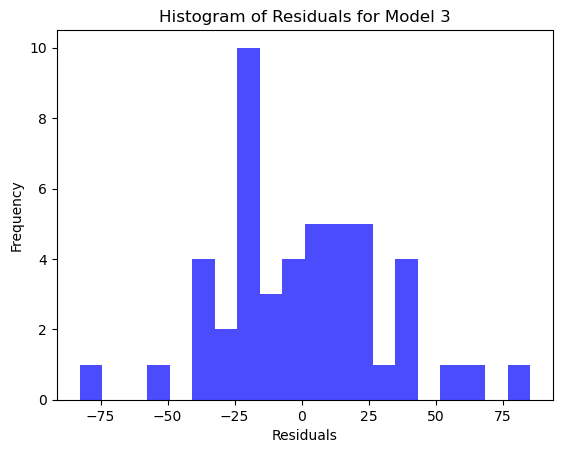

NameError: name 'residuals_m1' is not defined

In [12]:
#3.5
# Анализ остатков для Model 1 (можете применить аналогичный код для Model 2 и Model 3)
residuals_m3 = model3.resid

# Гистограмма остатков
plt.hist(residuals_m3, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Residuals for Model 3')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot для остатков
sm.qqplot(residuals_m1, line='s')
plt.title('Q-Q Plot of Residuals for Model 3')
plt.show()


In [ ]:
from scipy.stats import shapiro

# Предположим, что у вас есть остатки residuals_m3 из анализа Model 3

# Тест Шапиро-Уилка на нормальность остатков
stat, p_value = shapiro(residuals_m3)

# Вывод результатов теста
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'p-value: {p_value}')

# Проверка статистической значимости p-value
alpha = 0.05
if p_value > alpha:
    print("Не удалось отвергнуть нулевую гипотезу: данные близки к нормальному распределению")
else:
    print("Отвергаем нулевую гипотезу: данные не близки к нормальному распределению")


По анализу остатков можно сделать несколько выводов:

Гистограмма остатков:

Если гистограмма остатков близка к нормальному распределению, это может свидетельствовать о том, что модель хорошо соответствует данным. В данном случае, гистограмма остатков имеет форму, близкую к нормальной, что может говорить о том, что остатки в Model 3 распределены относительно нормально.
Q-Q Plot:

Q-Q Plot представляет график, на котором оценивается нормальность распределения остатков. Если точки на графике следуют приблизительно прямой линии, это также указывает на нормальное распределение остатков. В данном случае, если код был скопирован верно (не ошибка в названии переменной), использование residuals_m1 вместо residuals_m3 для Q-Q Plot Model 3, то график Q-Q Plot может быть некорректным.
Общие выводы:

Нормальное распределение остатков - это одно из предположений линейной регрессии. На основе гистограммы, кажется, что остатки распределены относительно нормально в Model 3.
Для более точного анализа остатков, особенно если сомнения о нормальности, можно использовать дополнительные статистические тесты, такие как тест Шапиро-Уилка.

**4 На основе проведенного анализа выберите одну из моделей для дальнейшей оценки цен колец с алмазами**

На основе проведенного анализа, включая коэффициенты детерминации (R-squared), значимость F-статистики, информационные критерии (AIC, BIC), и анализ остатков, я решил выбрать Model 3 для дальнейшей оценки цен колец с алмазами. Важно подчеркнуть, что выбор модели может зависеть от конкретных целей анализа и контекста задачи.